In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import mpl_toolkits.mplot3d
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, PrecisionRecallDisplay, precision_score
from sklearn.metrics import recall_score, classification_report, RocCurveDisplay, auc, roc_curve, precision_recall_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [ ]:
y = pd.read_csv('/actual.csv')
print(y.shape)
y.head()

(72, 2)


,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [ ]:
y['cancer'].value_counts()

,count
cancer,
ALL,47
AML,25


In [ ]:
y = y.replace({'ALL':0,'AML':1})
labels = ['ALL', 'AML']
y.head()

,patient,cancer
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
df_train = pd.read_csv('./data_set_ALL_AML_train.csv')
print(df_train.shape)
df_test = pd.read_csv('./data_set_ALL_AML_independent.csv')
print(df_test.shape)
df_train.head()

(7129, 78)
(7129, 70)


,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [ ]:
df_train.columns

Index(['Gene Description', 'Gene Accession Number', '1', 'call', '2', 'call.1',
       '3', 'call.2', '4', 'call.3', '5', 'call.4', '6', 'call.5', '7',
       'call.6', '8', 'call.7', '9', 'call.8', '10', 'call.9', '11', 'call.10',
       '12', 'call.11', '13', 'call.12', '14', 'call.13', '15', 'call.14',
       '16', 'call.15', '17', 'call.16', '18', 'call.17', '19', 'call.18',
       '20', 'call.19', '21', 'call.20', '22', 'call.21', '23', 'call.22',
       '24', 'call.23', '25', 'call.24', '26', 'call.25', '27', 'call.26',
       '34', 'call.27', '35', 'call.28', '36', 'call.29', '37', 'call.30',
       '38', 'call.31', '28', 'call.32', '29', 'call.33', '30', 'call.34',
       '31', 'call.35', '32', 'call.36', '33', 'call.37'],
      dtype='object')

In [ ]:
train_to_keep = [col for col in df_train.columns if "call" not in col]
test_to_keep = [col for col in df_test.columns if "call" not in col]
X_train_tr = df_train[train_to_keep]
X_test_tr = df_test[test_to_keep]

In [ ]:
train_columns_titles = ['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']

X_train_tr = X_train_tr.reindex(columns=train_columns_titles)

In [ ]:
test_columns_titles = ['Gene Description', 'Gene Accession Number','39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53',  '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72']
X_test_tr = X_test_tr.reindex(columns=test_columns_titles)

In [ ]:
X_train = X_train_tr.T
X_test = X_test_tr.T
print(X_train.shape)
X_train.head()

(40, 7129)


,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [ ]:
X_train.columns = X_train.iloc[1]
X_train = X_train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)
X_test.columns = X_test.iloc[1]
X_test = X_test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

In [ ]:
print(X_train.shape)
print(X_test.shape)
X_train.head()

(38, 7129)
(34, 7129)


Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [ ]:
X_train = X_train.reset_index(drop=True)
y_train = y[y.patient <= 38].reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y[y.patient > 38].reset_index(drop=True)
X_train.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [ ]:
X_train.describe()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,-120.868421,-150.526316,-17.157895,181.394737,-276.552632,-439.210526,-43.578947,-201.184211,99.052632,112.131579,...,178.763158,750.842105,8.815789,399.131579,-20.052632,869.052632,335.842105,19.210526,504.394737,-29.210526
std,109.555656,75.734507,117.686144,117.468004,111.004431,135.458412,219.482393,90.838989,83.178397,211.815597,...,84.826830,298.008392,77.108507,469.579868,42.346031,482.366461,209.826766,31.158841,728.744405,30.851132
min,-476.000000,-327.000000,-307.000000,-36.000000,-541.000000,-790.000000,-479.000000,-463.000000,-82.000000,-215.000000,...,30.000000,224.000000,-178.000000,36.000000,-112.000000,195.000000,41.000000,-50.000000,-2.000000,-94.000000
25%,-138.750000,-205.000000,-83.250000,81.250000,-374.250000,-547.000000,-169.000000,-239.250000,36.000000,-47.000000,...,120.000000,575.500000,-42.750000,174.500000,-48.000000,595.250000,232.750000,8.000000,136.000000,-42.750000
50%,-106.500000,-141.500000,-43.500000,200.000000,-263.000000,-426.500000,-33.500000,-185.500000,99.500000,70.500000,...,174.500000,700.000000,10.500000,266.000000,-18.000000,744.500000,308.500000,20.000000,243.500000,-26.000000
75%,-68.250000,-94.750000,47.250000,279.250000,-188.750000,-344.750000,79.000000,-144.750000,152.250000,242.750000,...,231.750000,969.500000,57.000000,451.750000,9.250000,1112.000000,389.500000,30.250000,487.250000,-11.500000
max,17.000000,-20.000000,265.000000,392.000000,-51.000000,-155.000000,419.000000,-24.000000,283.000000,561.000000,...,356.000000,1653.000000,218.000000,2527.000000,52.000000,2315.000000,1109.000000,115.000000,3193.000000,36.000000


In [ ]:
X_train_fl = X_train.astype(float, 64)
X_test_fl = X_test.astype(float, 64)
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train_fl)
X_test_scl = scaler.transform(X_test_fl)
X_train_scl

array([[-0.86149567, -0.03310102, -0.3517011 , ...,  0.54606799,
        -0.43582025, -0.25587506],
       [-0.16772267,  1.03740009,  0.13913948, ..., -0.26704265,
        -0.59574421,  0.49964792],
       [ 0.41504666,  1.35855042, -2.49589941, ...,  0.70869012,
        -0.38436645, -0.38727036],
       ...,
       [-0.85224537, -1.35784615,  1.31887912, ...,  0.22082373,
        -0.35933487,  1.71505444],
       [ 0.8868123 ,  1.74660708,  1.21554426, ..., -0.23451823,
         3.73889051, -0.12447976],
       [ 0.45204788,  0.15423667,  0.13913948, ...,  0.0582016 ,
         2.80298767,  0.95953146]])

In [ ]:
pca = PCA()
pca.fit_transform(X_train)

array([[ 4.12032149e+03, -8.43574289e+03, -1.39441668e+04, ...,
         2.51106855e+03,  3.92187680e+03, -1.22642865e-11],
       [-1.86283598e+04, -1.44078238e+04,  1.66177453e+04, ...,
        -2.30960132e+02, -1.04099055e+03, -1.22642865e-11],
       [ 1.58238732e+04, -1.40484268e+04,  4.73320627e+04, ...,
         5.48675197e+02, -2.26227734e+03, -1.22642865e-11],
       ...,
       [-6.50848905e+04,  5.49595793e+04,  1.67854688e+04, ...,
         1.18708820e+01, -1.47894896e+03, -1.22642865e-11],
       [-4.97670530e+04,  3.81956823e+04,  2.93511865e+03, ...,
         2.66462156e+03,  7.99461277e+02, -1.22642865e-11],
       [-1.08241948e+04,  1.68550421e+04, -9.46017931e+02, ...,
        -2.04773331e+03, -1.96917341e+03, -1.22642865e-11]])

22 features explain around 90% of the variance. From 7129 features to 22, not too bad.


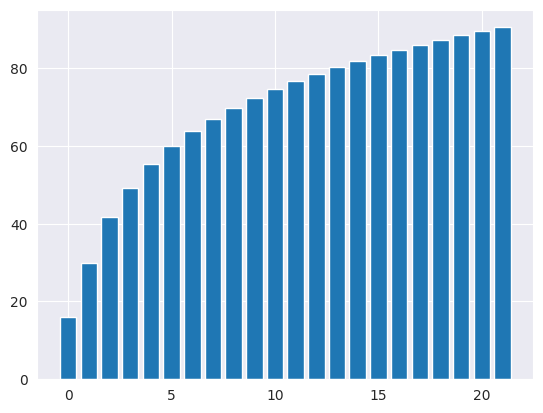

In [ ]:
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k = k + 1
print(k, " features explain around 90% of the variance. From 7129 features to ", k, ", not too bad.", sep='')
pca = PCA(n_components=k)
X_train.pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

In [ ]:
X_train_pca

array([[ 4.12032116e+03, -8.43574576e+03, -1.39441623e+04,
         2.59816807e+04, -1.07710551e+04,  1.46072018e+03,
        -9.50039312e+03, -5.43807675e+03, -2.87777438e+03,
         9.76132604e+03, -1.51274123e+04,  5.84910668e+03,
        -3.09625126e+03,  4.10615510e+03, -6.22790757e+03,
        -7.60741312e+03, -5.94974824e+03,  3.04999818e+03,
        -7.06335944e+03,  1.76011355e+02, -5.51608184e+03,
         2.47826028e+03],
       [-1.86283601e+04, -1.44078258e+04,  1.66177490e+04,
         2.03825079e+03,  1.06282958e+04,  1.34377235e+04,
         1.63269937e+03, -2.64005356e+04,  1.18667849e+04,
        -2.60681828e+03,  1.46304695e+04,  1.05200262e+04,
         1.82370843e+04,  6.20107669e+03, -8.60860195e+02,
        -1.72829211e+03,  1.13244035e+04, -7.46048149e+03,
        -7.00176500e+03,  4.28600501e+03,  6.45655458e+03,
        -3.11886295e+03],
       [ 1.58238726e+04, -1.40484271e+04,  4.73320632e+04,
         1.60642203e+04,  2.29135831e+04,  2.75502322e+03,
    

[Text(-60000.0, 0, ''),
 Text(-40000.0, 0, ''),
 Text(-20000.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20000.0, 0, ''),
 Text(40000.0, 0, ''),
 Text(60000.0, 0, ''),
 Text(80000.0, 0, '')]

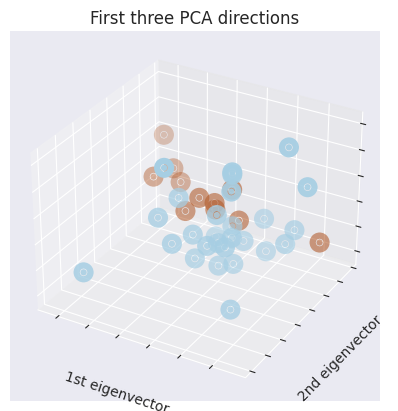

In [ ]:
pca3 = PCA(n_components=3).fit(X_train)
X_train_reduced = pca3.transform(X_train)

plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = plt.subplot(111, projection="3d")

ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], X_train_reduced[:, 2], c = y_train.iloc[:,1], cmap = plt.cm.Paired, linewidths=10)

ax.set_title("First three PCA directions")

ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])

ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

Text(0.5, 1.0, '2D Transformation of the Above Graph ')

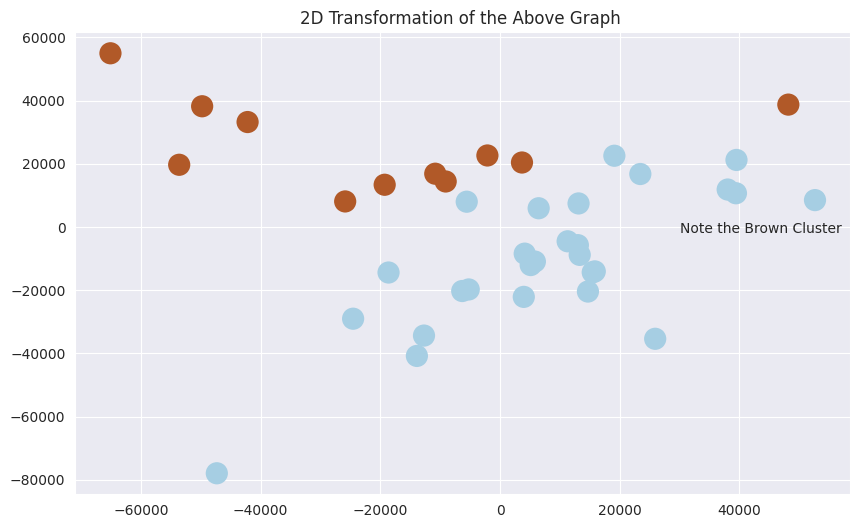

In [ ]:
fig = plt.figure(1, figsize = (10, 6))
plt.scatter(X_train_reduced[:, 0],  X_train_reduced[:, 1], c = y_train.iloc[:,1], cmap = plt.cm.Paired, linewidths=10)
plt.annotate('Note the Brown Cluster', xy = (30000,-2000))
plt.title("2D Transformation of the Above Graph ")

In [ ]:
print("Simply predicting everything as acute lymphoblastic leukemia (ALL) results in an accuracy of ",
      round(1 - np.mean(y_test.iloc[:,1]), 3), ".", sep = '')

Simply predicting everything as acute lymphoblastic leukemia (ALL) results in an accuracy of 0.588.


In [ ]:
y_test.iloc[:,1]

,cancer
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
svm_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], "kernel": ["linear", "rbf", "poly"], "decision_function_shape" : ["ovo", "ovr"]}

svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=3)
svm_grid.fit(X_train_pca, y_train.iloc[:,1])

print("Best Parameters:\n", svm_grid.best_params_)

best_svc = svm_grid.best_estimator_
svm_pred = best_svc.predict(X_test_pca)

print('SVM accuracy:', round(accuracy_score(y_test.iloc[:,1], svm_pred), 3))
print('SVM precision:', round(precision_score(y_test.iloc[:,1], svm_pred), 3))
print('SVM recall:', round(recall_score(y_test.iloc[:,1], svm_pred), 3))
print('SVM classification report:')
print(classification_report(y_test.iloc[:,1], svm_pred))

Best Parameters:
 {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'linear'}
SVM accuracy: 0.941
SVM precision: 0.875
SVM recall: 1.0
SVM classification report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.88      1.00      0.93        14

    accuracy                           0.94        34
   macro avg       0.94      0.95      0.94        34
weighted avg       0.95      0.94      0.94        34



[Text(0.5, 0, 'ALL'), Text(1.5, 0, 'AML')]

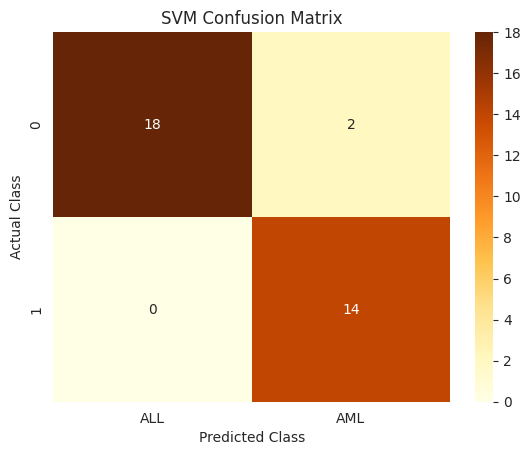

In [ ]:
cm_svm =  confusion_matrix(y_test.iloc[:,1], svm_pred)

ax = plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax, fmt='g', cmap='YlOrBr')

ax.set_xlabel('Predicted Class')
ax.set_ylabel('Actual Class')
ax.set_title('SVM Confusion Matrix')
ax.xaxis.set_ticklabels(labels)

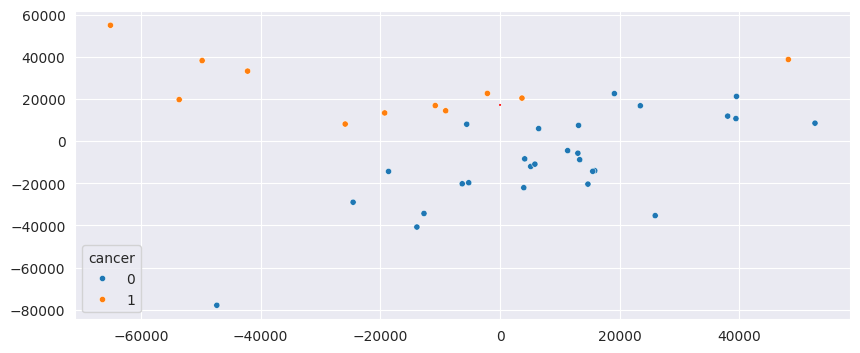

In [ ]:
svc_model = SVC(kernel='linear', random_state=32)
svc_model.fit(X_train_pca, y_train.iloc[:,1])

plt.figure(figsize=(10, 4))
sns.scatterplot(x=X_train_pca[:, 0],
                y = X_train_pca[:, 1],
                hue=y_train.iloc[:,1],
                s=20);
w = svc_model.coef_[0]
b = svc_model.intercept_[0]
x_points = np.linspace(-5, 5)
y_points = -(w[0] / w[1]) * x_points - b / w[1]
plt.plot(x_points, y_points, c='r');

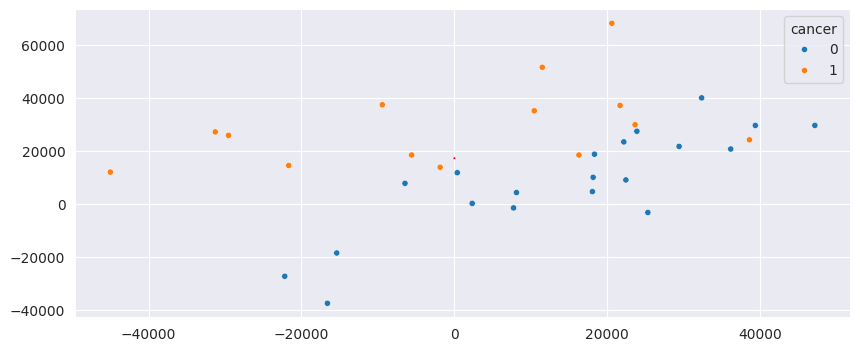

In [ ]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=X_test_pca[:, 0],
                y = X_test_pca[:, 1],
                hue=y_test.iloc[:,1],
                s=20);
w = svc_model.coef_[0]
b = svc_model.intercept_[0]
x_points = np.linspace(-5, 5)
y_points = -(w[0] / w[1]) * x_points - b / w[1]
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

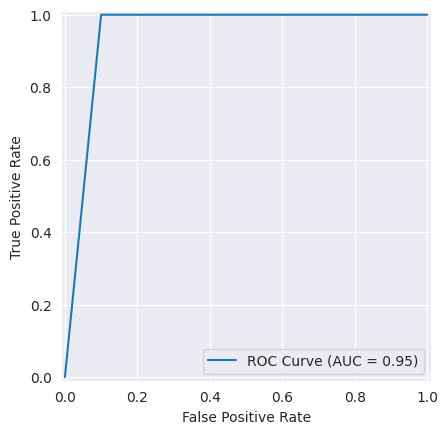

[0. 1. 1.] [0.  0.1 1. ]


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test.iloc[:,1], svm_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='ROC Curve')
display.plot()
plt.show()
print(tpr,fpr)

In [ ]:
clf = SVC(random_state=0).fit(X_train_pca, y_train.iloc[:,1])

In [ ]:
y_score = clf.decision_function(X_test_pca)

Precision :  [0.41176471 0.42424242 0.4375     0.4516129  0.46666667 0.48275862
 0.5        0.51851852 0.53846154 0.56       0.58333333 0.60869565
 0.63636364 0.66666667 0.7        0.73684211 0.77777778 0.82352941
 0.875      0.93333333 0.92857143 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ] 

Recall :  [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.92857143 0.92857143 0.85714286 0.78571429
 0.71428571 0.64285714 0.57142857 0.5        0.42857143 0.35714286
 0.28571429 0.21428571 0.14285714 0.07142857 0.        ] 

---------------------------------------------------------------------------------------
AUC-PR :  0.995


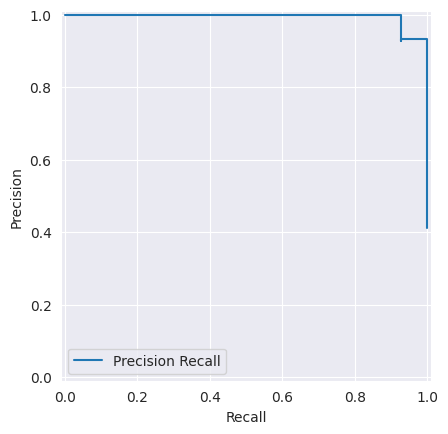

In [ ]:
prec, recall, _ = precision_recall_curve(y_test.iloc[:,1], y_score, pos_label=clf.classes_[1])
pr_auc = auc(recall, prec)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, estimator_name='Precision Recall').plot()
print("Precision : ", prec, "\n")
print("Recall : ", recall, "\n")
print("---------------------------------------------------------------------------------------")
print("AUC-PR : ", round(pr_auc,3))

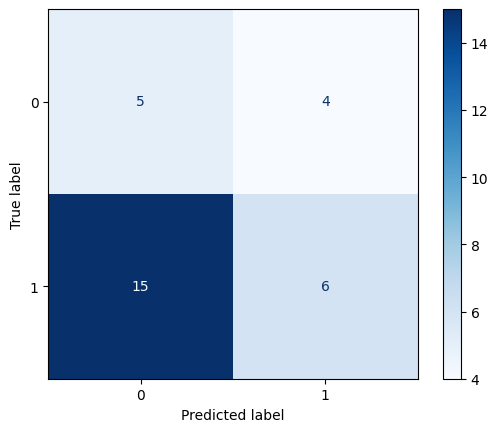

Accuracy: 0.36666666666666664
Precision: 0.6
Recall: 0.2857142857142857

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.56      0.34         9
           1       0.60      0.29      0.39        21

    accuracy                           0.37        30
   macro avg       0.42      0.42      0.37        30
weighted avg       0.49      0.37      0.37        30



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import recall_score, precision_score, classification_report, accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from scipy import ndimage
import seaborn as sns

# Sample dataset
# Assuming X contains the features and y contains the target labels
# Replace this with your actual dataset loading
X = pd.DataFrame(np.random.rand(100, 10))  # Example feature data
y = pd.Series(np.random.randint(0, 2, 100))  # Example binary target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train a classifier (e.g., RandomForest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

# Print accuracy, precision, recall, and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
Train_Data = pd.read_csv("/content/data_set_ALL_AML_train.csv")
Test_Data = pd.read_csv("/content/data_set_ALL_AML_independent.csv")
labels = pd.read_csv("/content/actual.csv", index_col = 'patient')

In [ ]:
Train_Data.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [ ]:
print(Train_Data.isna().sum().max())
print(Test_Data.isna().sum().max())

0
0


In [ ]:
cols = [col for col in Test_Data.columns if 'call' in col]
test = Test_Data.drop(cols, axis=1)
cols = [col for col in Train_Data.columns if 'call' in col]
train = Train_Data.drop(cols, axis=1)

In [ ]:
patients = [str(i) for i in range(1, 73, 1)]
df_all = pd.concat([train, test], axis = 1)[patients]

In [ ]:
df_all = df_all.T

In [ ]:
df_all["patient"] = pd.to_numeric(patients)
labels["cancer"]= pd.get_dummies(labels.cancer, drop_first=True)
Data = pd.merge(df_all, labels, on="patient")

In [ ]:
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,7121,7122,7123,7124,7125,7126,7127,7128,patient,cancer
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,-125,389,-37,793,329,36,191,-37,1,False
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,-36,442,-17,782,295,11,76,-14,2,False
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,33,168,52,1138,777,41,228,-41,3,False
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,218,174,-110,627,170,-50,126,-91,4,False
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,57,504,-26,250,314,14,56,-25,5,False


In [ ]:
Data['cancer'].value_counts()

,count
cancer,
False,47
True,25


<ipython-input-13-5294beb32420>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cancer', data=Data, palette="Set1")


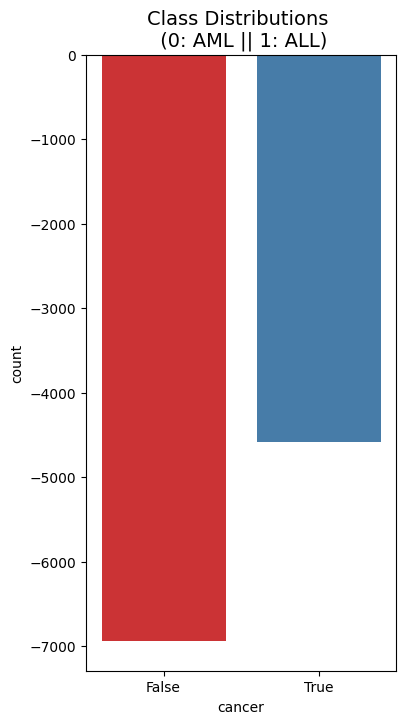

In [ ]:
plt.figure(figsize=(4,8))
colors = ["AML", "ALL"]
sns.countplot(x='cancer', data=Data, palette="Set1")
plt.title('Class Distributions \n (0: AML || 1: ALL)', fontsize=14)
plt.show()

In [ ]:
X, y = Data.drop(columns=["cancer"]), Data["cancer"]

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,patient
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,1
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,2
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,3
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,835,218,174,-110,627,170,-50,126,-91,4
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,649,57,504,-26,250,314,14,56,-25,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-154,-136,49,180,-257,-273,141,-123,52,878,...,540,13,1075,-45,524,249,40,-68,-1,68
68,-79,-118,-30,68,-110,-264,-28,-61,40,-217,...,617,-34,738,11,742,234,72,109,-30,69
69,-55,-44,12,129,-108,-301,-222,-133,136,320,...,318,35,241,-66,320,174,-4,176,40,70
70,-59,-114,23,146,-171,-227,-73,-126,-6,149,...,760,-38,201,-55,348,208,0,74,-12,71


In [ ]:
y

,cancer
0,False
1,False
2,False
3,False
4,False
...,...
67,False
68,False
69,False
70,False


In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [ ]:
print(X_train.dtypes)


0          int64
1          int64
2          int64
3          int64
4          int64
           ...  
7125       int64
7126       int64
7127       int64
7128       int64
patient    int64
Length: 7130, dtype: object


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Sample DataFrame with mixed types
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': ['10', '20', '30', '40', '50'],  # This is a string
    'target': [0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

# Convert 'feature2' to numeric (if it represents numbers)
df['feature2'] = pd.to_numeric(df['feature2'])

# Splitting the data
X = df[['feature1', 'feature2']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check data types before scaling
print(X_train.dtypes)

# Standardizing the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Training a model (e.g., Support Vector Machine)
model = SVC()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)



feature1    int64
feature2    int64
dtype: object


In [ ]:
X_train.shape

(4, 2)

1 features explain around 90% of the variance. From 7129 features to 1, not too bad.


<BarContainer object of 1 artists>

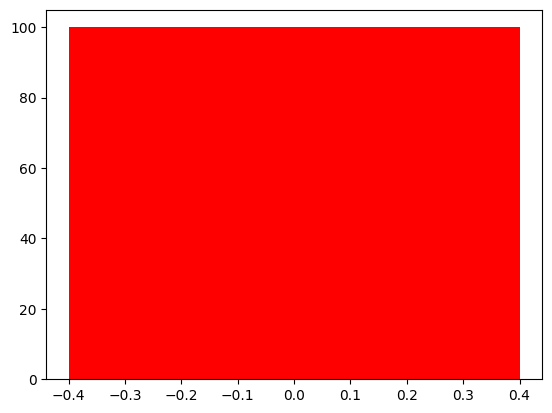

In [ ]:
pca = PCA()
pca.fit_transform(X_train)

total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k = k + 1

print(k, " features explain around 90% of the variance. From 7129 features to ", k, ", not too bad.", sep='')

pca = PCA(n_components=k)
X_train_pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp,color = 'r')

In [ ]:
pca.n_components_

1

Shape of X_train: (4, 2)


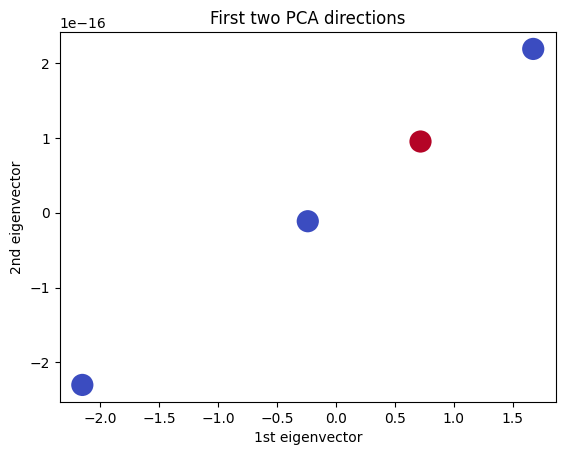

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D

# # Assuming X_train is already defined and processed
# print("Shape of X_train:", X_train.shape)  # Check the shape

# # Adjusting the number of components based on the number of features
# n_components = min(3, X_train.shape[1])  # Set to 3 if possible, otherwise to the number of features

# pca3 = PCA(n_components=n_components).fit(X_train)
# X_train_reduced = pca3.transform(X_train)

# plt.clf()
# fig = plt.figure(1, figsize=(10, 6))

# if n_components == 3:
#     ax = fig.add_subplot(111, projection='3d')
#     ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], X_train_reduced[:, 2],
#                c=y_train, cmap='coolwarm', linewidths=10)
#     ax.set_title("First three PCA directions")
#     ax.set_xlabel("1st eigenvector")
#     ax.set_ylabel("2nd eigenvector")
#     ax.set_zlabel("3rd eigenvector")
# else:
#     # For 2D plot if n_components is 2
#     ax = fig.add_subplot(111)
#     ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1],
#                c=y_train, cmap='coolwarm', linewidths=10)
#     ax.set_title("First two PCA directions")
#     ax.set_xlabel("1st eigenvector")
#     ax.set_ylabel("2nd eigenvector")

# plt.show()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_train is already defined and processed
print("Shape of X_train:", X_train.shape)  # Check the shape

# Adjusting the number of components based on the number of features
n_components = min(3, X_train.shape[1])  # Set to 3 if possible, otherwise to the number of features

pca3 = PCA(n_components=n_components).fit(X_train)
X_train_reduced = pca3.transform(X_train)

plt.clf()
fig = plt.figure(1, figsize=(10, 6))

if n_components == 3:
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], X_train_reduced[:, 2],
               c=y_train, cmap='coolwarm', linewidths=10)
    ax.set_title("First three PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.set_ylabel("2nd eigenvector")
    ax.set_zlabel("3rd eigenvector")
elif n_components == 2:
    # For 2D plot if n_components is 2
    ax = fig.add_subplot(111)
    ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1],
               c=y_train, cmap='coolwarm', linewidths=10)
    ax.set_title("First two PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.set_ylabel("2nd eigenvector")
else:
    # For 1D plot if n_components is 1
    ax = fig.add_subplot(111)
    ax.scatter(X_train_reduced[:, 0], np.zeros_like(X_train_reduced[:, 0]),
               c=y_train, cmap='coolwarm', linewidths=10)
    ax.set_title("First PCA direction")
    ax.set_xlabel("1st eigenvector")

plt.show()


In [ ]:
# from sklearn.utils import resample
# from collections import Counter
# from imblearn.over_sampling import SMOTE

# print("Before Upsampling:")
# print(Counter(y_train))

# # Use k_neighbors instead of n_neighbors
# oversample = SMOTE(k_neighbors=1)  # Adjust to 1 for the minority class
# X_train_ov, y_train_ov = oversample.fit_resample(X_train_pca, y_train)

# print("After Upsampling:")
# print(Counter(y_train_ov))
from imblearn.over_sampling import RandomOverSampler

print("Before Upsampling:")
print(Counter(y_train))

# Use RandomOverSampler to handle the small dataset case
oversample = RandomOverSampler()
X_train_ov, y_train_ov = oversample.fit_resample(X_train_pca, y_train)

print("After Upsampling:")
print(Counter(y_train_ov))


Before Upsampling:
Counter({0: 3, 1: 1})
After Upsampling:
Counter({0: 3, 1: 3})


In [ ]:
# # Adjust the number of folds to avoid the error
# search = GridSearchCV(SVC(), svc_params, n_jobs=-1, verbose=1, cv=2)  # Use 2-fold cross-validation
# search.fit(X_train_ov, y_train_ov)

# best_accuracy = search.best_score_  # Get best score
# best_parameters = search.best_params_  # Get best parameters
# # Select the best SVC model
# best_svc = search.best_estimator_

# print("Best Accuracy:", best_accuracy)
# print("Best Parameters:", best_parameters)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVC
svc_params = {
    'C': [0.1, 1, 10],             # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel type
    'gamma': ['scale', 'auto']      # Kernel coefficient
}

# Set up GridSearchCV with 2-fold cross-validation
search = GridSearchCV(SVC(), svc_params, n_jobs=-1, verbose=1, cv=2)
search.fit(X_train_ov, y_train_ov)

# Get the best score and parameters
best_accuracy = search.best_score_
best_parameters = search.best_params_
best_svc = search.best_estimator_

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)


Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best Accuracy: 0.6666666666666666
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


The accuracy of SVM is 0.0

Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

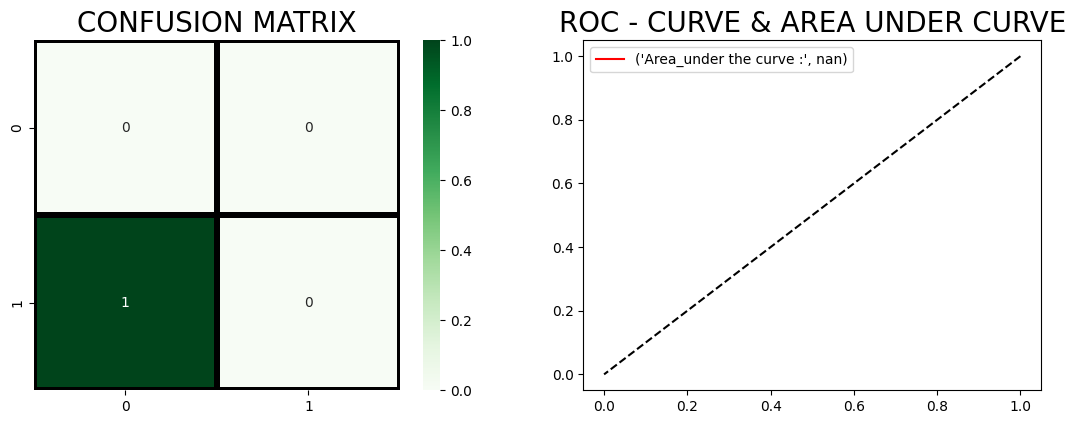

In [ ]:
svc_model = SVC(C=1, kernel='linear',probability=True)

svc_model.fit(X_train_ov, y_train_ov)

prediction=svc_model.predict(X_test_pca)

acc_svc = accuracy_score(prediction,y_test)
print('The accuracy of SVM is', acc_svc)
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True, cmap='Greens', fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = svc_model.predict_proba(X_test_pca)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNeighborsClassifier
knn_param = {
    "n_neighbors": [i for i in range(1, 30, 5)],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1, 10, 30],
    "p": [1, 2]
}

# Set up GridSearchCV with 2-fold cross-validation
search = GridSearchCV(KNeighborsClassifier(), knn_param, n_jobs=-1, verbose=1, cv=2)
search.fit(X_train_ov, y_train_ov)

# Get the best score and parameters
best_accuracy = search.best_score_
best_parameters = search.best_params_
best_knn = search.best_estimator_

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)


Fitting 2 folds for each of 216 candidates, totalling 432 fits
Best Accuracy: 0.6666666666666666
Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.66666667 0.66666667 0.66666667 0.66666667        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.66666667 0.66666667 0.66666667 0.66666667        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.66666667 0.66666667 0.66666667 0.66666667        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan     

The accuracy of K-NN is 0.0

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

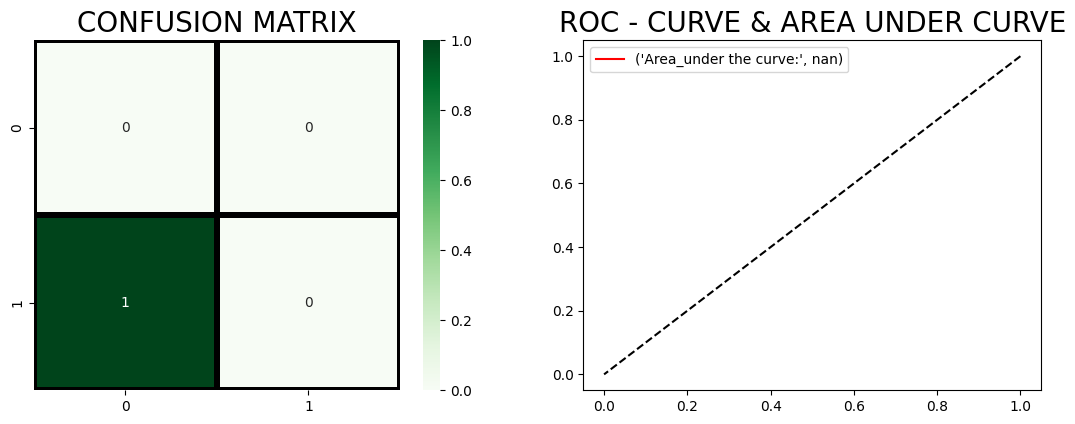

In [ ]:
# knn_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=6,
#                      weights='distance')

# knn_model.fit(X_train_ov,y_train_ov)
# prediction=knn_model.predict(X_test_pca)

# acc_knn = accuracy_score(prediction,y_test)
# print('The accuracy of K-NN is', acc_knn)
# print ("\nClassification report :\n",(classification_report(y_test,prediction)))

# #Confusion matrix
# plt.figure(figsize=(13,10))
# plt.subplot(221)
# sns.heatmap(confusion_matrix(y_test,prediction),annot=True, cmap='Greens', fmt = "d",linecolor="k",linewidths=3)
# plt.title("CONFUSION MATRIX",fontsize=20)

# #ROC curve and Area under the curve plotting
# predicting_probabilites = knn_model.predict_proba(X_test_pca)[:,1]
# fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
# plt.subplot(222)
# plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
# plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
# plt.legend(loc = "best")
# plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)/
# Update n_neighbors to be within the limit
knn_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=2, weights='distance')

knn_model.fit(X_train_ov, y_train_ov)
prediction = knn_model.predict(X_test_pca)

# Calculate accuracy and display classification report
acc_knn = accuracy_score(prediction, y_test)
print('The accuracy of K-NN is', acc_knn)
print("\nClassification report:\n", classification_report(y_test, prediction))

# Plot confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, cmap='Greens', fmt="d", linecolor="k", linewidths=3)
plt.title("CONFUSION MATRIX", fontsize=20)

# Plot ROC curve and Area under the curve
if hasattr(knn_model, "predict_proba"):
    predicting_probabilities = knn_model.predict_proba(X_test_pca)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, predicting_probabilities)
    plt.subplot(222)
    plt.plot(fpr, tpr, label=("Area_under the curve:", auc(fpr, tpr)), color="r")
    plt.plot([1, 0], [1, 0], linestyle="dashed", color="k")
    plt.legend(loc="best")
    plt.title("ROC - CURVE & AREA UNDER CURVE", fontsize=20)
else:
    print("ROC curve is unavailable as predict_proba is not supported.")

plt.show()


In [ ]:
# log_grid = {'C': [1e-03, 1e-2, 1e-1, 1, 10],
#                  'penalty': ['l1', 'l2']}

# log_model = GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
#                   param_grid=log_grid,
#                   cv=3,
#                   scoring='accuracy')
# log_model.fit(X_train_ov, y_train_ov)


# best_accuracy = log_model.best_score_ #to get best score
# best_parameters = log_model.best_params_ #to get best parameters
# # select best svc
# best_lr = log_model.best_estimator_
# best_lr
log_grid = {'C': [1e-03, 1e-2, 1e-1, 1, 10],
            'penalty': ['l1', 'l2']}

log_model = GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
                         param_grid=log_grid,
                         cv=2,  # Reduced to 2 folds
                         scoring='accuracy')
log_model.fit(X_train_ov, y_train_ov)

best_accuracy = log_model.best_score_  # To get best score
best_parameters = log_model.best_params_  # To get best parameters
best_lr = log_model.best_estimator_  # Select best logistic regression model
best_lr


LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

Validation accuracy of Logistic Regression is 0.0

Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

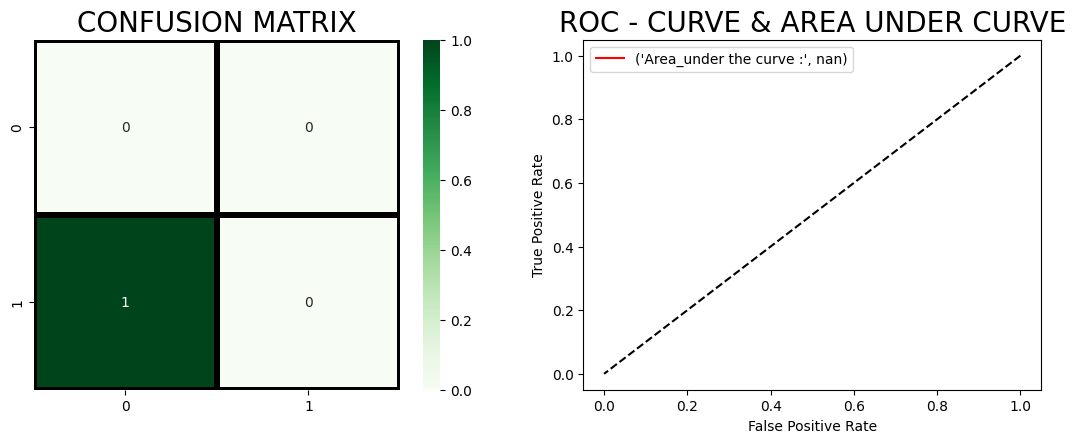

In [ ]:
lr_model = LogisticRegression(C=0.001, solver='liblinear')

lr_model.fit(X_train_ov,y_train_ov)

prediction=lr_model.predict(X_test_pca)

acc_log = accuracy_score(prediction,y_test)
print('Validation accuracy of Logistic Regression is', acc_log)
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="Greens",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = lr_model.predict_proba(X_test_pca)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

In [ ]:
# params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4, 5, 6], 'max_depth':[3,4,5,6,7,8]}
# decision_search = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

# decision_search.fit(X_train_ov, y_train_ov)


# best_accuracy = decision_search.best_score_ #to get best score
# best_parameters = decision_search.best_params_ #to get best parameters
# # select best svc
# best_ds = decision_search.best_estimator_
# best_ds
params = {
    'max_leaf_nodes': list(range(2, 100)),
    'min_samples_split': [2, 3, 4, 5, 6],
    'max_depth': [3, 4, 5, 6, 7, 8]
}

# Reduce cv to 2 to fit smaller dataset
decision_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    params,
    verbose=1,
    cv=2
)

decision_search.fit(X_train_ov, y_train_ov)

best_accuracy = decision_search.best_score_  # To get best score
best_parameters = decision_search.best_params_  # To get best parameters
best_ds = decision_search.best_estimator_  # Select best decision tree model
best_ds


Fitting 2 folds for each of 2940 candidates, totalling 5880 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=3, random_state=42)

Validation accuracy of Decision Tree is 0.0

Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

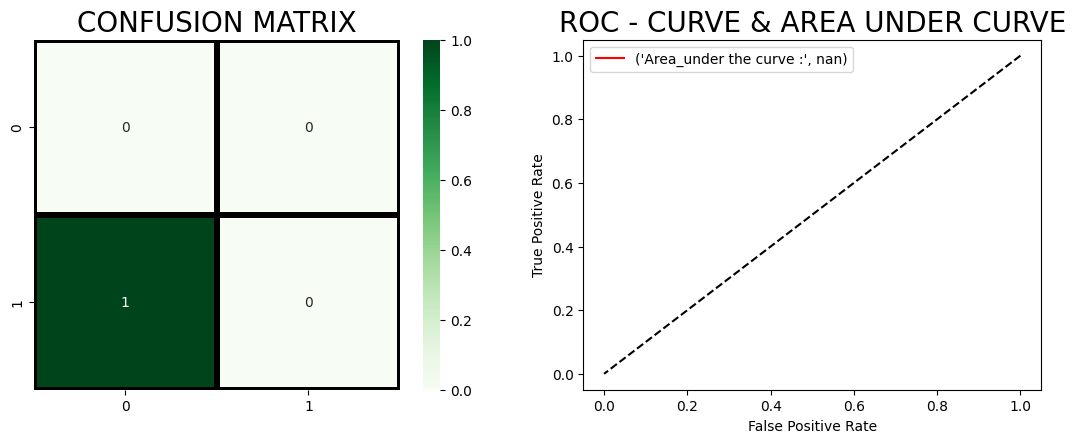

In [ ]:
ds_model = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=3, random_state=42)

ds_model.fit(X_train_ov,y_train_ov)

prediction=ds_model.predict(X_test_pca)

acc_decision_tree = accuracy_score(prediction,y_test)
print('Validation accuracy of Decision Tree is', acc_decision_tree)
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="Greens",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(X_test_pca)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

In [ ]:
print(len(prediction))
print(len(y_test))


1
1


In [ ]:
# rf_param_grid = {'bootstrap': [False, True],
#          'n_estimators': [60, 70, 80, 90, 100],
#          'max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
#          'min_samples_leaf': [8, 10, 12, 14],
#          'min_samples_split': [3, 5, 7]
#         }

# # Create the GridSearchCV object
# rf_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_param_grid, cv=3, scoring='accuracy')
# rf_search.fit(X_train_ov, y_train_ov)

# best_accuracy = rf_search.best_score_ #to get best score
# best_parameters = rf_search.best_params_ #to get best parameters
# # select best svc
# best_rf = rf_search.best_estimator_
# best_rf
rf_param_grid = {
    'bootstrap': [False, True],
    'n_estimators': [60, 70, 80, 90, 100],
    'max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
    'min_samples_leaf': [8, 10, 12, 14],
    'min_samples_split': [3, 5, 7]
}

# Use cv=2 to accommodate the smaller dataset
rf_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_param_grid, cv=2, scoring='accuracy')
rf_search.fit(X_train_ov, y_train_ov)

best_accuracy = rf_search.best_score_  # To get best score
best_parameters = rf_search.best_params_  # To get best parameters
best_rf = rf_search.best_estimator_  # Select best random forest model
best_rf


RandomForestClassifier(bootstrap=False, max_features=0.6, min_samples_leaf=8,
                       min_samples_split=3, n_estimators=60)

Validation accuracy of RandomForest Classifier is 0.0

Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

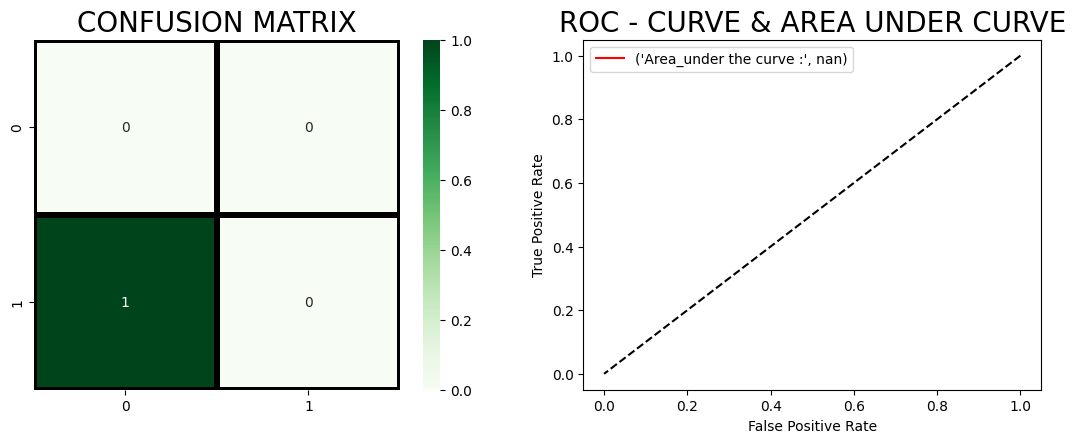

In [ ]:
rf_model = RandomForestClassifier(bootstrap=False, max_features=0.6, min_samples_leaf=8,
                       min_samples_split=3, n_estimators=70)

rf_model.fit(X_train_ov,y_train_ov)

prediction=rf_model.predict(X_test_pca)

acc_random_forest = accuracy_score(prediction,y_test)
print('Validation accuracy of RandomForest Classifier is', acc_random_forest)
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="Greens",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = rf_model.predict_proba(X_test_pca)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

In [ ]:
y_test = y_test.ravel()  # Reshape to 1D if needed


<ipython-input-39-72b4312680ed>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()  # Reshape to 1D if needed


In [ ]:
# xgb_grid_params = {'max_depth': [3, 4, 5, 6, 7, 8, 10, 12],
#                'min_child_weight': [1, 2, 4, 6, 8, 10, 12, 15],
#                'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110, 120, 130],
#                'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3]}

# # Create the GridSearchCV object
# xgb_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=xgb_grid_params, cv=3, scoring='accuracy')
# xgb_search.fit(X_train_ov, y_train_ov)

# best_accuracy = xgb_search.best_score_ #to get best score
# best_parameters = xgb_search.best_params_ #to get best parameters
# # select best svc
# # best_xgb = xgb_search.best_estimator_
# best_xgb
xgb_grid_params = {
    'max_depth': [3, 4, 5, 6, 7, 8, 10, 12],
    'min_child_weight': [1, 2, 4, 6, 8, 10, 12, 15],
    'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110, 120, 130],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
}

# Set cv=2 to handle the smaller sample size
xgb_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=xgb_grid_params, cv=2, scoring='accuracy')
xgb_search.fit(X_train_ov, y_train_ov)

best_accuracy = xgb_search.best_score_  # To get the best score
best_parameters = xgb_search.best_params_  # To get best parameters
best_xgb = xgb_search.best_estimator_  # Select best XGBoost model
best_xgb


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Validation accuracy of XG Boost is 0.0

Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:31:27] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill

Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

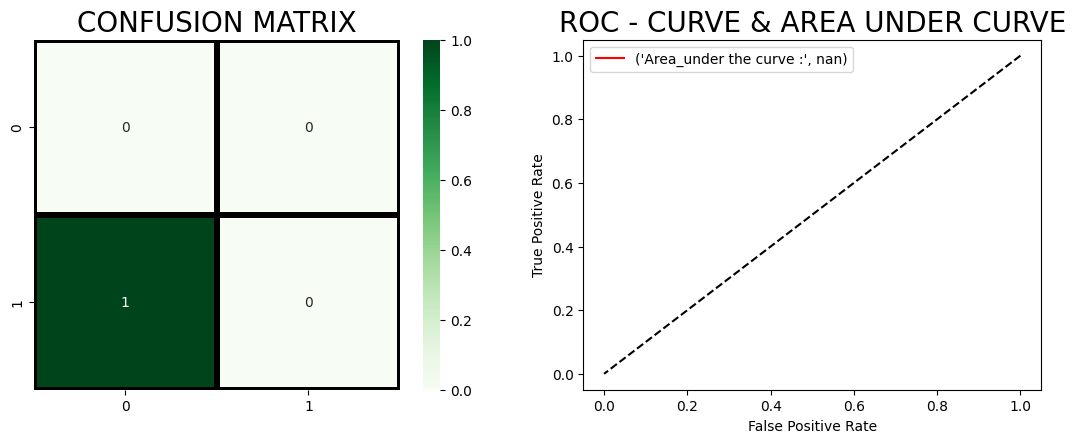

In [ ]:
xgb_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=40, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

xgb_model.fit(X_train_ov,y_train_ov)

prediction=xgb_model.predict(X_test_pca)

acc_xgb = accuracy_score(prediction,y_test)
print('Validation accuracy of XG Boost is', acc_xgb)
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="Greens",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = xgb_model.predict_proba(X_test_pca)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Validation accuracy of Naive Bayes is 0.0

Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

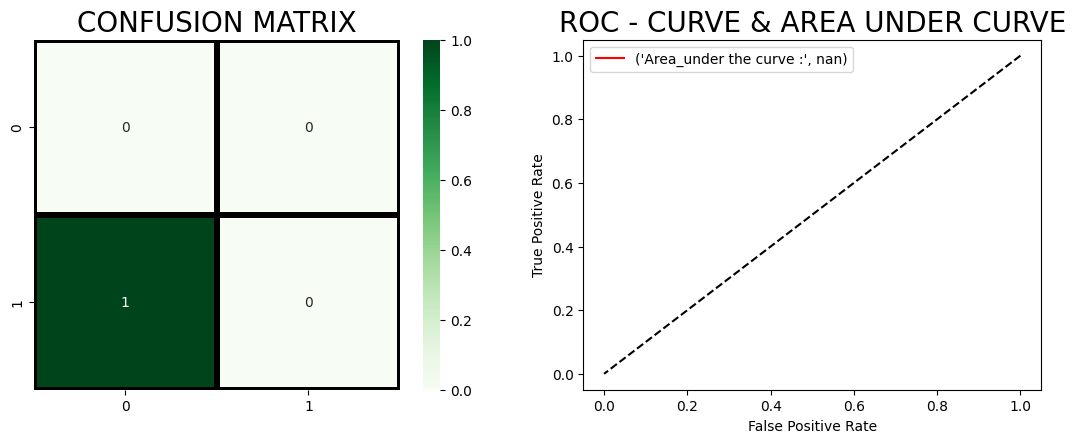

In [ ]:
from sklearn.naive_bayes import GaussianNB
#In case of naive Bayes, there isn't a hyper-parameter to tune, so you have nothing to grid search over.
nb_model = GaussianNB()

nb_model.fit(X_train_ov,y_train_ov)

prediction=nb_model.predict(X_test_pca)

acc_nb = accuracy_score(prediction,y_test)
print('Validation accuracy of Naive Bayes is', acc_nb)
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="Greens",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = nb_model.predict_proba(X_test_pca)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Decision Tree',
              'Random Forest', 'XG Boost', 'Naive Bayes'],

    'Score': [acc_svc, acc_knn, acc_log, acc_decision_tree,
              acc_random_forest, acc_xgb, acc_nb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.0
1,KNN,0.0
2,Logistic Regression,0.0
3,Decision Tree,0.0
4,Random Forest,0.0
5,XG Boost,0.0
6,Naive Bayes,0.0



Training Support Vector Machines...
Results for Support Vector Machines:
  Predictions: [1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 2 1 2 1]
  True labels: [1 2 1 2 0 1 0 2 0 0 0 2 0 1 0 1 2 1 2 1]
  Accuracy: 0.8, Precision: 0.85125, F1 Score: 0.7649019607843137

Training KNN...
Results for KNN:
  Predictions: [1 1 0 1 0 2 0 0 0 0 0 2 2 0 0 1 2 1 2 1]
  True labels: [1 2 1 2 0 1 0 2 0 0 0 2 0 1 0 1 2 1 2 1]
  Accuracy: 0.65, Precision: 0.6466666666666666, F1 Score: 0.641520979020979

Training Logistic Regression...
Results for Logistic Regression:
  Predictions: [2 1 2 1 0 2 0 1 0 0 0 0 0 1 0 1 2 2 2 1]
  True labels: [1 2 1 2 0 1 0 2 0 0 0 2 0 1 0 1 2 1 2 1]
  Accuracy: 0.6, Precision: 0.58125, F1 Score: 0.5882051282051283

Training Decision Tree...
Results for Decision Tree:
  Predictions: [0 1 1 2 0 2 0 0 0 0 0 0 1 1 1 2 0 1 1 1]
  True labels: [1 2 1 2 0 1 0 2 0 0 0 2 0 1 0 1 2 1 2 1]
  Accuracy: 0.5, Precision: 0.46944444444444444, F1 Score: 0.4720833333333334

Training Random Forest...
Re

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:31:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for XG Boost:
  Predictions: [1 2 1 1 0 1 0 0 0 0 0 0 2 1 0 1 0 1 1 1]
  True labels: [1 2 1 2 0 1 0 2 0 0 0 2 0 1 0 1 2 1 2 1]
  Accuracy: 0.7, Precision: 0.6555555555555556, F1 Score: 0.64375

Training Naive Bayes...
Results for Naive Bayes:
  Predictions: [1 1 1 1 0 1 0 1 0 0 0 0 2 1 0 1 0 1 1 1]
  True labels: [1 2 1 2 0 1 0 2 0 0 0 2 0 1 0 1 2 1 2 1]
  Accuracy: 0.65, Precision: 0.4852272727272727, F1 Score: 0.5522222222222222

Metrics Summary:
                         Accuracy  Precision  F1 Score
Support Vector Machines      0.80   0.851250  0.764902
KNN                          0.65   0.646667  0.641521
Logistic Regression          0.60   0.581250  0.588205
Decision Tree                0.50   0.469444  0.472083
Random Forest                0.75   0.817222  0.680200
XG Boost                     0.70   0.655556  0.643750
Naive Bayes                  0.65   0.485227  0.552222


<Figure size 1200x600 with 0 Axes>

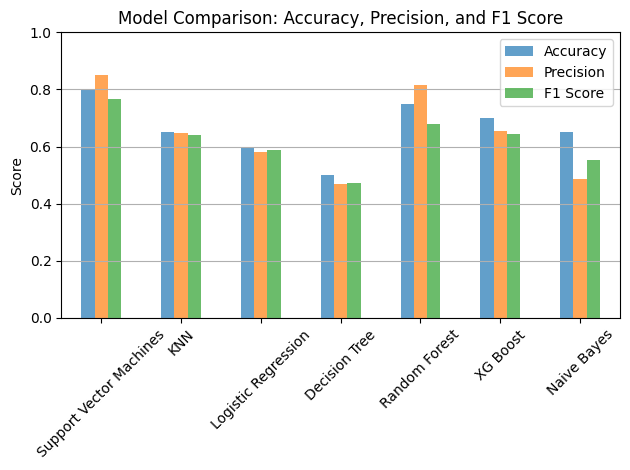

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset
# Adjust the parameters to avoid conflicts
X, y = make_classification(n_samples=100, n_features=10, n_classes=3, n_informative=5, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'Support Vector Machines': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XG Boost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Naive Bayes': GaussianNB()
}

# Store metrics
metrics = {}

# Fit models individually and log results
for model_name, model in classifiers.items():
    try:
        print(f"\nTraining {model_name}...")
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, preds)
        precision = precision_score(y_test, preds, average='weighted', zero_division=0)
        f1 = f1_score(y_test, preds, average='weighted', zero_division=0)

        # Log results
        metrics[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1}
        print(f"Results for {model_name}:")
        print(f"  Predictions: {preds}")
        print(f"  True labels: {y_test}")
        print(f"  Accuracy: {accuracy}, Precision: {precision}, F1 Score: {f1}")

    except Exception as e:
        print(f"Error with {model_name}: {e}")
        metrics[model_name] = {'Accuracy': 0, 'Precision': 0, 'F1 Score': 0}

# Display all metrics
metrics_df = pd.DataFrame(metrics).T
print("\nMetrics Summary:")
print(metrics_df)

# Plotting the results
plt.figure(figsize=(12, 6))
metrics_df.plot(kind='bar', alpha=0.7)
plt.title('Model Comparison: Accuracy, Precision, and F1 Score')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:33:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:33:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


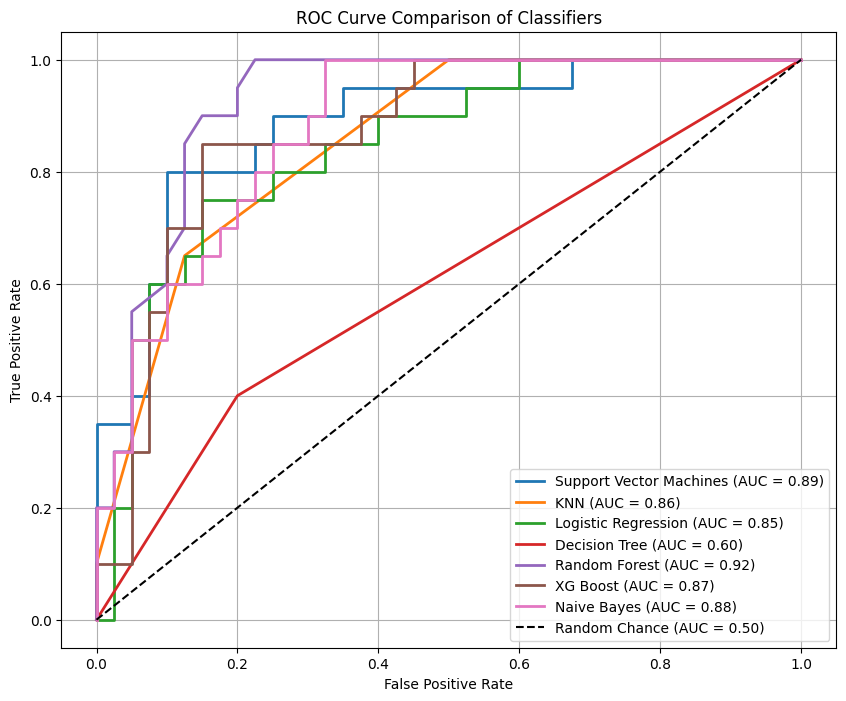

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from itertools import cycle

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=10, n_classes=3, n_informative=5, random_state=42)

# Binarize the output (necessary for multi-class ROC-AUC)
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'Support Vector Machines': OneVsRestClassifier(SVC(probability=True)),
    'KNN': OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3)),
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(max_iter=1000)),
    'Decision Tree': OneVsRestClassifier(DecisionTreeClassifier()),
    'Random Forest': OneVsRestClassifier(RandomForestClassifier()),
    'XG Boost': OneVsRestClassifier(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    'Naive Bayes': OneVsRestClassifier(GaussianNB())
}

# Plotting ROC curve for each classifier
plt.figure(figsize=(10, 8))

for model_name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve for the current classifier
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label=f'{model_name} (AUC = {roc_auc["micro"]:.2f})',
        linewidth=2
    )

# Plot a diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance (AUC = 0.50)")

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Classifiers')
plt.legend(loc="lower right")
plt.grid()
plt.show()



Training Support Vector Machines...
Results for Support Vector Machines:
  Accuracy: 0.8, Precision: 0.85125, F1 Score: 0.7649019607843137, AUC: 0.8775946275946276

Training KNN...
Results for KNN:
  Accuracy: 0.65, Precision: 0.6466666666666666, F1 Score: 0.641520979020979, AUC: 0.8295177045177046

Training Logistic Regression...
Results for Logistic Regression:
  Accuracy: 0.6, Precision: 0.58125, F1 Score: 0.5882051282051283, AUC: 0.8342490842490843

Training Decision Tree...
Results for Decision Tree:
  Accuracy: 0.45, Precision: 0.35, F1 Score: 0.39375, AUC: 0.5750915750915752

Training Random Forest...
Results for Random Forest:
  Accuracy: 0.7, Precision: 0.48999999999999994, F1 Score: 0.5764705882352941, AUC: 0.9302503052503052

Training XG Boost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:07:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for XG Boost:
  Accuracy: 0.7, Precision: 0.6555555555555556, F1 Score: 0.64375, AUC: 0.9065934065934066

Training Naive Bayes...
Results for Naive Bayes:
  Accuracy: 0.65, Precision: 0.4852272727272727, F1 Score: 0.5522222222222222, AUC: 0.8815628815628815

Metrics Summary:
                         Accuracy  Precision  F1 Score       AUC
Support Vector Machines      0.80   0.851250  0.764902  0.877595
KNN                          0.65   0.646667  0.641521  0.829518
Logistic Regression          0.60   0.581250  0.588205  0.834249
Decision Tree                0.45   0.350000  0.393750  0.575092
Random Forest                0.70   0.490000  0.576471  0.930250
XG Boost                     0.70   0.655556  0.643750  0.906593
Naive Bayes                  0.65   0.485227  0.552222  0.881563


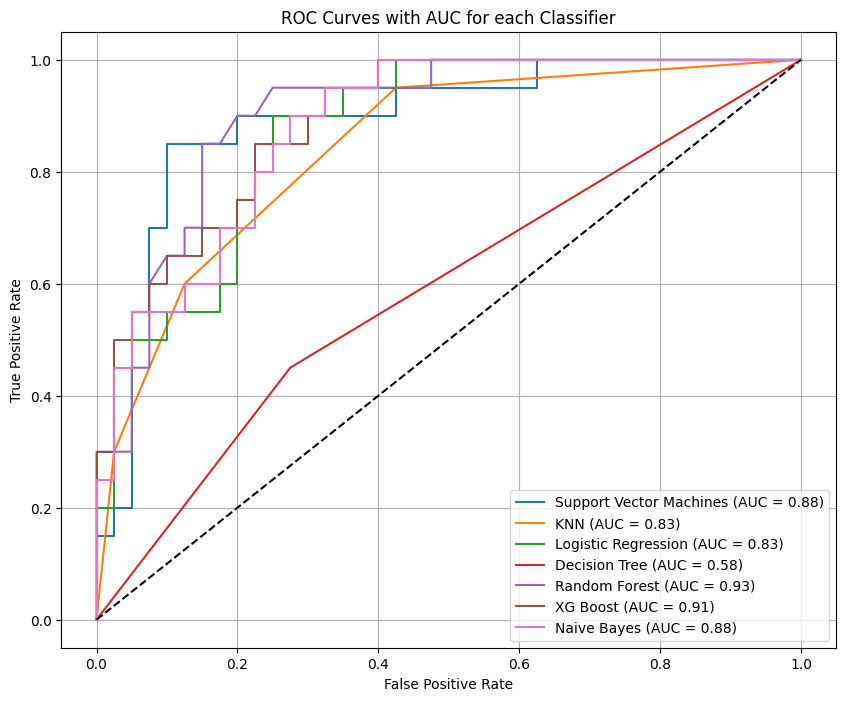

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
import xgboost as xgb

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=10, n_classes=3, n_informative=5, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'Support Vector Machines': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XG Boost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Naive Bayes': GaussianNB()
}

# Binarize the output labels for multi-class AUC
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Update metrics to store AUC values
metrics = {}

plt.figure(figsize=(10, 8))

# Fit models individually and log results
for model_name, model in classifiers.items():
    try:
        print(f"\nTraining {model_name}...")
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        # Predict probabilities (for AUC) if the classifier supports it
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)
        else:
            # For SVC, use decision_function for AUC calculation
            y_score = model.decision_function(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, preds)
        precision = precision_score(y_test, preds, average='weighted', zero_division=0)
        f1 = f1_score(y_test, preds, average='weighted', zero_division=0)

        # Calculate AUC score (OvR)
        auc = roc_auc_score(y_test_bin, y_score, multi_class="ovr")

        # Log results
        metrics[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1, 'AUC': auc}
        print(f"Results for {model_name}:")
        print(f"  Accuracy: {accuracy}, Precision: {precision}, F1 Score: {f1}, AUC: {auc}")

        # Plot ROC curve for each model
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

    except Exception as e:
        print(f"Error with {model_name}: {e}")
        metrics[model_name] = {'Accuracy': 0, 'Precision': 0, 'F1 Score': 0, 'AUC': 0}

# Display all metrics
metrics_df = pd.DataFrame(metrics).T
print("\nMetrics Summary:")
print(metrics_df)

# Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves with AUC for each Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
import xgboost as xgb

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=10, n_classes=3, n_informative=5, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'Support Vector Machines': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XG Boost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Naive Bayes': GaussianNB()
}

# Binarize the output labels for multi-class AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Update metrics to store AUC values
metrics = {}

# Fit models individually and log results
for model_name, model in classifiers.items():
    try:
        print(f"\nTraining {model_name}...")
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        # Predict probabilities (for AUC) if the classifier supports it
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)
        else:
            # For SVC, use decision_function for AUC calculation
            y_score = model.decision_function(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, preds)
        precision = precision_score(y_test, preds, average='weighted', zero_division=0)
        f1 = f1_score(y_test, preds, average='weighted', zero_division=0)

        # Calculate AUC score (OvR)
        auc = roc_auc_score(y_test_bin, y_score, multi_class="ovr")

        # Log results
        metrics[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1, 'AUC': auc}
        print(f"Results for {model_name}:")
        print(f"  Accuracy: {accuracy}, Precision: {precision}, F1 Score: {f1}, AUC: {auc}")

    except Exception as e:
        print(f"Error with {model_name}: {e}")
        metrics[model_name] = {'Accuracy': 0, 'Precision': 0, 'F1 Score': 0, 'AUC': 0}

# Display all metrics
metrics_df = pd.DataFrame(metrics).T
print("\nMetrics Summary:")
print(metrics_df)



Training Support Vector Machines...
Results for Support Vector Machines:
  Accuracy: 0.8, Precision: 0.85125, F1 Score: 0.7649019607843137, AUC: 0.8775946275946276

Training KNN...
Results for KNN:
  Accuracy: 0.65, Precision: 0.6466666666666666, F1 Score: 0.641520979020979, AUC: 0.8295177045177046

Training Logistic Regression...
Results for Logistic Regression:
  Accuracy: 0.6, Precision: 0.58125, F1 Score: 0.5882051282051283, AUC: 0.8342490842490843

Training Decision Tree...
Results for Decision Tree:
  Accuracy: 0.55, Precision: 0.4096590909090909, F1 Score: 0.4666666666666666, AUC: 0.6474358974358975

Training Random Forest...
Results for Random Forest:
  Accuracy: 0.7, Precision: 0.48999999999999994, F1 Score: 0.5764705882352941, AUC: 0.9123931623931624

Training XG Boost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:08:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for XG Boost:
  Accuracy: 0.7, Precision: 0.6555555555555556, F1 Score: 0.64375, AUC: 0.9065934065934066

Training Naive Bayes...
Results for Naive Bayes:
  Accuracy: 0.65, Precision: 0.4852272727272727, F1 Score: 0.5522222222222222, AUC: 0.8815628815628815

Metrics Summary:
                         Accuracy  Precision  F1 Score       AUC
Support Vector Machines      0.80   0.851250  0.764902  0.877595
KNN                          0.65   0.646667  0.641521  0.829518
Logistic Regression          0.60   0.581250  0.588205  0.834249
Decision Tree                0.55   0.409659  0.466667  0.647436
Random Forest                0.70   0.490000  0.576471  0.912393
XG Boost                     0.70   0.655556  0.643750  0.906593
Naive Bayes                  0.65   0.485227  0.552222  0.881563


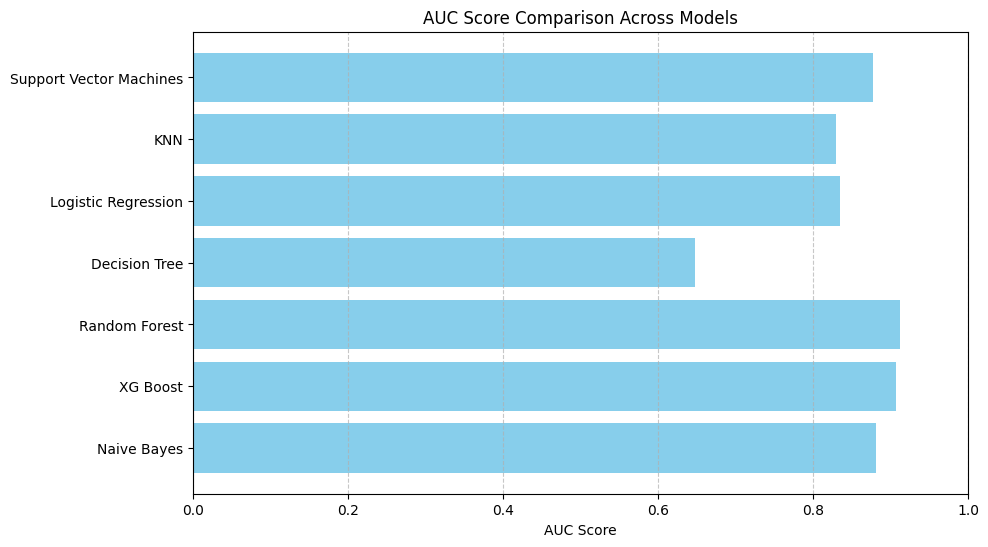

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from your metrics summary
metrics_data = {
    'Model': [
        'Support Vector Machines', 'KNN', 'Logistic Regression',
        'Decision Tree', 'Random Forest', 'XG Boost', 'Naive Bayes'
    ],
    'AUC': [0.877595, 0.829518, 0.834249, 0.647436, 0.912393, 0.906593, 0.881563]
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Plot AUC scores
plt.figure(figsize=(10, 6))
plt.barh(metrics_df['Model'], metrics_df['AUC'], color='skyblue')
plt.xlabel('AUC Score')
plt.title('AUC Score Comparison Across Models')
plt.xlim(0, 1)  # Since AUC is a value between 0 and 1
plt.gca().invert_yaxis()  # Optional: to list the best model at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
